# Андрєєв Данило, ІПС-41

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('Expanded_data_with_more_features.csv')

In [2]:
# 1. How many male and female students are in the dataset?
gender_counts = data['Gender'].value_counts()
print("Male students:", gender_counts['male'])
print("Female students:", gender_counts['female'])

Male students: 15217
Female students: 15424


In [3]:
# 2. What percentage of students are male in the dataset?
male_percentage = (gender_counts['male'] / data.shape[0]) * 100
print("Male student percentage:", male_percentage)

Male student percentage: 49.6622172905584


In [4]:
# 3. What percentage of students are female in the dataset?
female_percentage = (gender_counts['female'] / data.shape[0]) * 100
print("Female student percentage:", female_percentage)

Female student percentage: 50.337782709441605


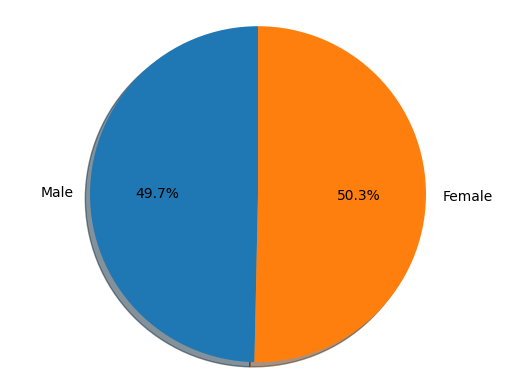

In [5]:
labels = 'Male', 'Female'
sizes = [male_percentage, female_percentage]
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [6]:
# 4. Which ethnic group has the highest average score in math?
highest_math = data.groupby('EthnicGroup')['MathScore'].mean().idxmax()
print(highest_math)

group E


In [7]:
# 5. Which ethnic group has the highest average score in reading?
highest_reading = data.groupby('EthnicGroup')['ReadingScore'].mean().idxmax()
print(highest_reading)

group E


In [8]:
# 6. Which ethnic group has the highest average score in writing?
highest_writing = data.groupby('EthnicGroup')['WritingScore'].mean().idxmax()
print(highest_writing)

group E


In [9]:
# 7. What is the average math score for students who completed the test preparation course?
avg_math_completed = data[data['TestPrep'] == 'completed']['MathScore'].mean()
print(avg_math_completed)

69.5466599698644


In [10]:
# 8. What is the average reading score for students who completed the test preparation course?
avg_reading_completed = data[data['TestPrep'] == 'completed']['ReadingScore'].mean()
print(avg_reading_completed)

73.73299849321948


In [11]:
# 9. What is the average writing score for students who completed the test preparation course?
avg_writing_completed = data[data['TestPrep'] == 'completed']['WritingScore'].mean()
print(avg_writing_completed)

74.70326469111


In [12]:
# 10. How many students have married parents?
married_parents = data[data['ParentMaritalStatus'] == 'married'].shape[0]
print(married_parents)

16844


In [13]:
# 11. How many students have single parents?
single_parents = data[data['ParentMaritalStatus'] == 'single'].shape[0]
print(single_parents)

7097


In [14]:
# 12. Do students who regularly participate in sports have higher average math scores than those who never participate in sports?
avg_math_sports = data.groupby('PracticeSport')['MathScore'].mean()
print(avg_math_sports['regularly'] > avg_math_sports['never'])

True


In [15]:
# 13. Do students who regularly participate in sports have higher average reading scores than those who never participate in sports?
avg_reading_sports = data.groupby('PracticeSport')['ReadingScore'].mean()
print(avg_reading_sports['regularly'] > avg_reading_sports['never'])

True


In [16]:
# 14. How many students use the school bus to get to school?
school_bus_count = data[data['TransportMeans'] == 'school_bus'].shape[0]
print(school_bus_count)

16145


In [17]:
# 15. How many students use private transportation to get to school?
private_transport_count = data[data['TransportMeans'] == 'private'].shape[0]
print(private_transport_count)

11362


# Classification task

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score


In [19]:
X = data.dropna().drop("TestPrep", axis=1)
y = data.dropna()["TestPrep"]

categorical_features = ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'TransportMeans', 'WklyStudyHours']
numeric_features = ['NrSiblings', 'MathScore', 'ReadingScore', 'WritingScore']

preprocessor = ColumnTransformer(transformers=[
    ('num', SimpleImputer(strategy='median'), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

scaler = StandardScaler()

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('scaler', scaler),
                           ('classifier', LogisticRegression(solver='liblinear', random_state=42))])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.75
